# Estatística

3 tipos:

- Descritiva: organizar e resumir dados
- probabilidade: avaliar o acaso
- inferência: tirar resultados do todo observando as partes

# Observação e experimento

a observação não consegue verificar causa e efeito, experimento consegue

# Variáveis 

Quantitativas: São numéricas
Qualitativas: Categóricas

# Amostragem I

Parte de uma população que representa o todo, e todos os elementos devem ter a mesma chance de serem selecionados

- População: todo mundo
- Amostra: subconjunto da população
- Censo: pesquisa com toda a população

> Amostra != população

## Enviesamento

Superestimar ou subestimar parâmetros, escolher sem ser aleatório

# Amostragem II

Normalmente nem em aplicações computacionais se usa todo o conjunto de dados.

Lembrar da parte de ML onde precisa de população de teste; treino; validação


# Amostragem III

Existem 3 tipos principais:

## Amostra aleatória simples

Retirar elementos de forma aleatória da população, garantindo que todos tenham as mesmas chances de serem selecionados. 

Com reposição o elemento pode ser selecionado novamente, o sem reposição, não.

## Amostra estratificada

Classificar a população em subgrupos

## Amostra sistemática

Seleciona um número de pessoas de forma sequencial até um número máximo. Quando chegar nesse número máximo é sorteado outro número, e as pessoas são selecionadas de forma sequencial novamente até atingir o limite.



In [40]:
!pip install pandas
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [41]:

# Amostragem simples
import pandas as pd
import numpy as np

df = pd.read_csv('datasets/Iris.csv')

sample = np.random.choice(a = [0,1], size = 150, replace=True, p= [0.5, 0.5])
len(sample[sample==1])
len(sample[sample == 0])

73

In [42]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable


In [44]:

# amostragem estratificada
import pandas as pd
from sklearn.model_selection import train_test_split

iris = pd.read_csv('datasets/Iris.csv')
iris.head()
iris['Species'].value_counts()

X, _, y, _ = train_test_split(iris.iloc[:, 0:4], iris['Species'], test_size=0.5, stratify=iris['Species'])

infert = pd.read_csv('datasets/infert.csv')
infert['education'].value_counts()

X1, _, y1, _ = train_test_split(infert.iloc[:, 2:9], infert['education'], test_size=0.6, stratify=infert['education'])

y1.value_counts()

6-11yrs    48
12+ yrs    46
0-5yrs      5
Name: education, dtype: int64

In [10]:
# Amostragem sistemática
import pandas as pd
import numpy as np
from math import ceil

population = 150
sample = 15
k = ceil(population/sample)

r = np.random.randint(low = 1, high = k+1, size = 1)

acc = r[0]
sort = []

for i in range(sample):
    sort.append(acc)
    acc += k

df = pd.read_csv('datasets/Iris.csv')
data = df.loc[sort]

# Centralidade

## média

Da população:

$ \mu = \frac{\sum x}{N} $

Da amostra:

$\bar{X} = \frac{\sum x}{n -1}$

## moda

Valor mais frequente

## Mediana

valor do meio com o vetor de valores ordenado crescentemente

Se o número de elementos for ímpar basta pegar o valor $(n/2 + n+1/2)/2$

# Variabilidade

## Variância

Distância entre os dados **em relação à média**

Da população:

$\sigma^2 = \frac{\sum(x_i - \bar{x})^2}{N}$

Da amostra:

$s^2 = \frac{\sum(x_i - \bar{x})^2}{n}$

## Desvio padrão

Raiz da variância


## Amplitude

Diferença entre o maior e menor valor

## Quartis

Divide os dados em 4 partes para avaliar de forma mais uniforme


In [1]:
# Centralidade e variabilidade
import numpy as np
from scipy import stats

players = [40000, 18000, 12000, 250000, 30000, 140000, 300000, 40000, 800000]

np.mean(players)
np.median(players)

quantiles = np.quantile(players, [0, .25, .5, .75, 1])

np.std(players, ddof=1)

stats.describe(players)


DescribeResult(nobs=9, minmax=(12000, 800000), mean=181111.11111111112, variance=65182111111.11111, skewness=1.758635899846188, kurtosis=1.9572075427527729)

# Probabilidade

Probabilidade (P):

$0 < P < 1$

- P = 0: evento impossível
- P = 1: evento certo

Termos:

- Experimento: o que está sendo estudado
- Espaço amostral: possibilidades
- Evento: resultado do experimento

Excludentes e não excludentes:

- Excludente: não ocorrem 2 eventos distintos ao mesmo tempo -> somam-se as probabilidades 
- Não-Excludente: ocorrem 2 eventos distintos ao mesmo tempo -> diminui-se as probabilidades simultâneas

Nos eventos dependentes e independentes:

- Independentes: multiplicam-se as probabilidades (ex tirar 3 no dado 4 vezes seguidas)
- Dependentes: também multiplicam-se as probabilidades mas o espaço amostral muda (ex tirar 2 e depois 3 no baralho sem repor as cartas)



# Distribuições

Forma de distribuir os dados, mostrar frequência de ocorrencias

## Distribuição binomial

É discreta. Seus pré-requisitos são:

- Numero fixo de experimentos
- 2 resultados (true ou false)
- probabilidade de sucesso deve ser a mesma por experimento
- experimentos independentes

Convenções: 

- $X = $ total de sucesso
- $p = $ probabilidade de sucesso
- $n = $ número de experimentos
- $1-p=$ probabilidade de fracasso

A fórmula para calcular pela distribuição binomial é:

$$ f(x) = \binom{n}{x} p^x(1-p)^{(n-x)} $$ 

onde:

$$  \binom{n}{x} = \frac{n!}{k!(n-k)!}$$


### Exemplo

Jogando uma moeda 5 vezes, qual a chance de dar cara 3 vezes?

$$f(x) =  \binom{5}{3} 0.5^x(1-0.5)^{(5-3)}$$

Calculando isso tudo aí na calculadora dá:

$$f(x) = 0.3125$$




In [17]:
# Distribuição binomial
from scipy.stats import binom

p = binom.pmf(3, 5, 0.5) # o binômio aqui é invertido (?)
print(f'p = {p}')

for i in range(5):
  print(f'p = {binom.pmf(i, 4, 0.25)}')

print(f'Prob. comulativa = {binom.cdf(4, 4, 0.25)}')

p = 0.3125
p = 0.31640625000000006
p = 0.4218750000000001
p = 0.21093750000000006
p = 0.046875000000000035
p = 0.003906250000000001
Prob. comulativa = 1.0


## Distribuição normal

Maioria dos dados ficam ao centro, sendo 68% deles em cerca de $\pm 1\sigma$

### Teorema central do limite

Conforme o o tamanho da amostra aumenta, as médias amostrais se aproximam da distribuição normal

Independente da distribuição dos dados as médias estão uniformemente distribuidas.

## Normal padrão

Mostra o valor normalizado:

$$ Z = \frac{X - \mu}{\sigma}$$

Características: 

- Média zero
- Desvio padrão 1

### Exemplo

- Numa cesta há objetos com pesos normalmente distribuídos, com média 8 e desvio padrão 2. Qual a chance de tirar um objeto de menos de 6kg?

Usando a normal padronizada:

$$ Z = \frac{X - \mu}{\sigma} \quad \to \quad Z = \frac{6 - 8}{2} = -1$$

Procurando -1 na tabela de desvios obtemos:

$$P = 0.1587$$

- Qual a chance de tirar um objeto com menos de 6kg ou mais de 10kg?

Calcula a probabilidade para cada condição e depois soma pois é um OU

## Verificando a normalidade da distribuição

- A maneira mais fácil de verificar é fazendo um histograma dos dados, para verificar a frequência de ocorrência de cada.
- Gerar diagrama de probabilidade normal, fica uma reta se for normal.
- Teste de Shapiro-Wilk (?)

In [16]:
# Distribuição normal
from scipy.stats import norm

# peso menor do que 6kg
less_6 = norm.cdf(6, 8, 2)

# peso maior do que 6kg
greater_6 = norm.sf(6,8,2)

# menor que 6 ou maior que 10
less_6_greater_10 = less_6 + norm.sf(10,8,2)

# entre 8 e 10:
between_8_10 = norm.sf(8, 8, 2) - norm.sf(10, 8, 2)

print(f'{greater_6=}, {less_6=}, {less_6_greater_10=}, {between_8_10=}')

greater_6=0.8413447460685429, less_6=0.15865525393145707, less_6_greater_10=0.31731050786291415, between_8_10=0.3413447460685429


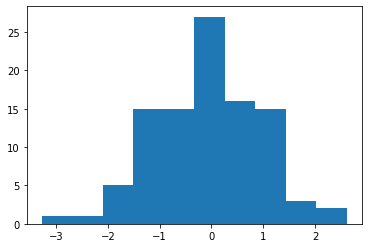

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

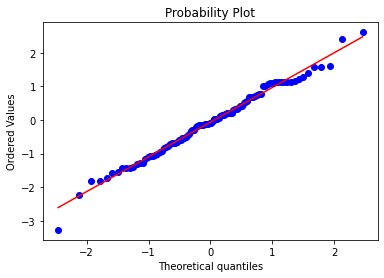

In [15]:
# teste normal
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

data = norm.rvs(size = 100)

plt.hist(data)
plt.show()
plt.clf()

stats.probplot(data, plot = plt)

# Intervalos de confiança

Para representar a população por meio da amostra é preciso cuidado pois os dados podem ficar enviesados, ruins e está sujeito à um erro padrão.

Usando amostra devemos esperar variação entre amostras. É possível medir a variação esperada

- Intervalo de confiança é usado para estimar o erro
- parâmetro é o valor a ser estimado
- margem de erro é a variabilidade em $\pm$
- nível de confiança é de 80% a 99%
- tamanho da amostra é (n)

A compensação consiste em aumentar alguns parâmetros:

- aumentar o nível de confiança aumenta o erro padrão
- aumentar o tamanho da amostra reduz o erro padrão

Existem 2 tipos de intervalo de confiança:

- para a média
- para a proporção

## Exemplo - intervalo para a média

Estimar o salário médio de um cientista de dados.

- 100 pesquisados (escolha)
- Intervalo de confiança: 95% (escolha)
- desvio padrão = 1100 (calculado)
- média = 5800 (calculado)
- valor $Z^*$ = 1.96 (tabelado)
- margem de erro = 
$$\bar{X} \pm Z \cdot \frac{\sigma}{\sqrt{n}} = \pm 215.60$$

Assim, o salário médio é de R\$ $5800,00\pm 215.60$ com um nível de confiança de 95%

## Exemplo - intervalo para a proporção

Estimar a proporção de eleitores que pretendem votar em ABC para prefeito

- 1000 pesquisados
- intervalo de confiança = 95%
- 650 votam em ABC = 0.65
- 330 votam em DEF = 0.33
- 20 não votam em nenhum = 0.02
- $Z^* = 1.96$

calculando o intervalo para a proporção:

$$ \hat{p} \pm Z \cdot \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}} \to \hat{p} \pm 0.03 $$

Assim, $68\% \pm 3\%$ votam em ABC